# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

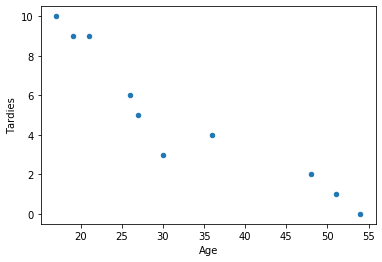

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

student_data.plot.scatter('Age','Tardies')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
There seems to be a trend, the older the student, the less tardies he has.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
a =student_data.corr()

#covariance:
b=student_data.cov()

a, b

(              Age   Tardies
 Age      1.000000 -0.939163
 Tardies -0.939163  1.000000,                 Age    Tardies
 Age      187.655556 -45.566667
 Tardies  -45.566667  12.544444)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.24282077091598084
The intercept is: 12.88880336313577


Plot your regression model on your scatter plot.

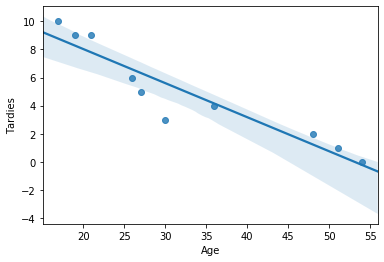

In [9]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
vehicles = pd.read_csv("C:/Users/tvpia/Desktop/q/Vehicles.csv")


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Your response here. 
vehicles2=vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]
corr_v2=vehicles2.corr()
corr_v2["CO2 Emission Grams/Mile"]
#The year is the least important in determining CO2 emissions, I would have thought the cylinders would be the most important in determining the CO2 emissions


Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
from sklearn.linear_model import LinearRegression

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']
lm=LinearRegression()
model = lm.fit(X,Y)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

Intercept:  769.8882836465332
Coef:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [26]:
# Your code here.
df = pd.DataFrame({"invited" : [1,3,4,6,8,9,11,14],"attended":[1,2,4,4,5,7,8,13]})
df

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

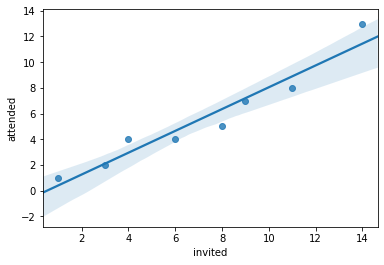

In [27]:
# Your code here.
sns.regplot(x="invited",y="attended",data=df)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
# Your response here. 
X=df.invited
Y=df.attended
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
slope, intercept, r_value

(0.8484848484848485, -0.43939393939393945, 0.9652303546573691)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [37]:
# Your response here. 

##### What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
